# Urbanization Unveiled: Navigating Human-Wildlife Encounters through Data

A mosaic of numbers and narratives.

# Animal related complaints in Brisbane 🐭

from April to June 2023

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


✨ How does rapid urbanization impact our coexistence with the creatures that share our urban sanctuary? ✨

☆ Hypothesis ☆


🏘🏘🏘🏘 = 🐶❌

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
filepath = "cars-srsa-open-data-animal-related-complaints-apr-to-jun-2023 (1).xlsx"

animal_df = pd.read_excel(filepath, skiprows=1)
print("done")


done


In [6]:
animal_df.head()


,Index,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb
0,1,Animal,Public space,Not under effective control,MOGGILL
1,2,Animal,Wandering at large,Cat,BALD HILLS
2,3,Animal,Attack,Not An Attack,BRACKEN RIDGE
3,4,Animal,Attack,Not An Attack,INDOOROOPILLY
4,5,Animal,Dog,Fencing Issues,CARINA


Here you can see I have extracted the first 5 rows of my dataset.

In [7]:
animal_df.sample(5)


,Index,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb
115,116,Animal,Attack,Not An Attack,GAYTHORNE
2924,2925,Animal,Unregistered dog,First Response letter,ELLEN GROVE
2747,2748,Animal,Public space,Defecating in public,NEW FARM
2591,2592,Animal,Park,Dog off-leash,VIRGINIA
2135,2136,Animal,Other Animal,Fox,HEMMANT


And here are 5 random rows I have extracted from the dataset.

In [8]:
animal_df.columns

Index(['Index', 'Category: Nature', 'Category: Type',
       'Category: Reporting Level', 'Location: Suburb'],
      dtype='object')

Let's break this down. For example, what could a cat wandering at large mean?

In [9]:
row_one = animal_df.iloc[1]
row_one


Index                                         2
Category: Nature                         Animal
Category: Type               Wandering at large
Category: Reporting Level                   Cat
Location: Suburb                     BALD HILLS
Name: 1, dtype: object

In [10]:
row_one["Index"]

2

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [11]:
row_one.index

Index(['Index', 'Category: Nature', 'Category: Type',
       'Category: Reporting Level', 'Location: Suburb'],
      dtype='object')

Doing the same thing on a dataframe gives us the whole column

In [12]:
animal_df["Category: Nature"].value_counts()

Category: Nature
Animal           2983
Attack by Dog       7
Name: count, dtype: int64

In [13]:
animal_df.sample(3 )

,Index,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb
690,691,Animal,Permit required,Dog,RUNCORN
1348,1349,Animal,Unregistered dog,NaN,BELMONT
277,278,Animal,Attack,NaN,KELVIN GROVE


In [14]:
def get_Typenew(add):
         return (str("Category: Nature")) + (str("Category: Reporting Level"))

animal_df["Type"] = animal_df.apply(get_Typenew, axis=1)
animal_df.sample(5)

,Index,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb,Type
835,836,Animal,Impounded Animal,Dog,DEAGON,Category: NatureCategory: Reporting Level
1085,1086,Animal,Impounded Animal,Other,DURACK,Category: NatureCategory: Reporting Level
2088,2089,Animal,Impounded Animal,Dog,FAIRFIELD,Category: NatureCategory: Reporting Level
609,610,Animal,Unregistered dog,NaN,THE GAP,Category: NatureCategory: Reporting Level
2528,2529,Animal,Unregistered dog,First Response letter,MORNINGSIDE,Category: NatureCategory: Reporting Level


In [15]:
import statistics

data = "cars-srsa-open-data-animal-related-complaints-apr-to-jun-2023 (1).xlsx"
animal_df["Category: Reporting Level"].value_counts()

Category: Reporting Level
First Response letter            503
Dog                              411
Dog off-leash                    295
Cat                              146
Attack On A Person               134
Not An Attack                    122
Fox                              110
Attack On An Animal              107
Fencing Issues                    77
Wandering                         67
Unregistered                      60
Unlawful Breeding                 58
Unlawful Supply                   52
Menacing                          25
Wild Dog                          23
Defecating in public              18
Rooster                           17
Not under effective control       14
Investigation and Enforcement     13
Rabbit                             8
Too Many Animals                   8
Deer                               7
Odour - Other                      6
Poultry - Enclosure                5
Rush/ Non-Contact                  4
Odour                              4
Odour - Dog 

In [16]:
import statistics

data = "cars-srsa-open-data-animal-related-complaints-apr-to-jun-2023 (1).xlsx"
foo = animal_df["Location: Suburb"].value_counts()

foo.mean()

15.612021857923498

In [17]:
import statistics

data = "cars-srsa-open-data-animal-related-complaints-apr-to-jun-2023 (1).xlsx"
foo = animal_df["Category: Reporting Level"].value_counts()

foo.std()

110.26862305646709

In [18]:
import statistics

print(statistics.mean([411, 295, 23, 4]))

183.25


In [19]:
mu = 183.25
sigma = 110.3
x = mu + sigma * np.random.randn(10000)

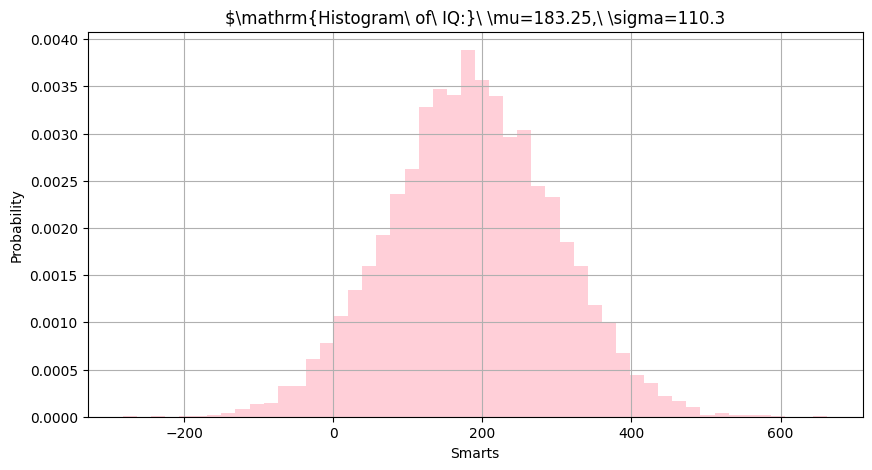

In [20]:
plt.hist(x, 50, density=1, facecolor="pink", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=183.25,\ \sigma=110.3"
)  # allows for latex formatting
plt.grid(True)
# plt.show()

Visualizing the data !

<Axes: title={'center': 'Bar Graph of Animal Complaints in Brisbane'}, xlabel='Category: Type', ylabel='Frequency of Complaints'>

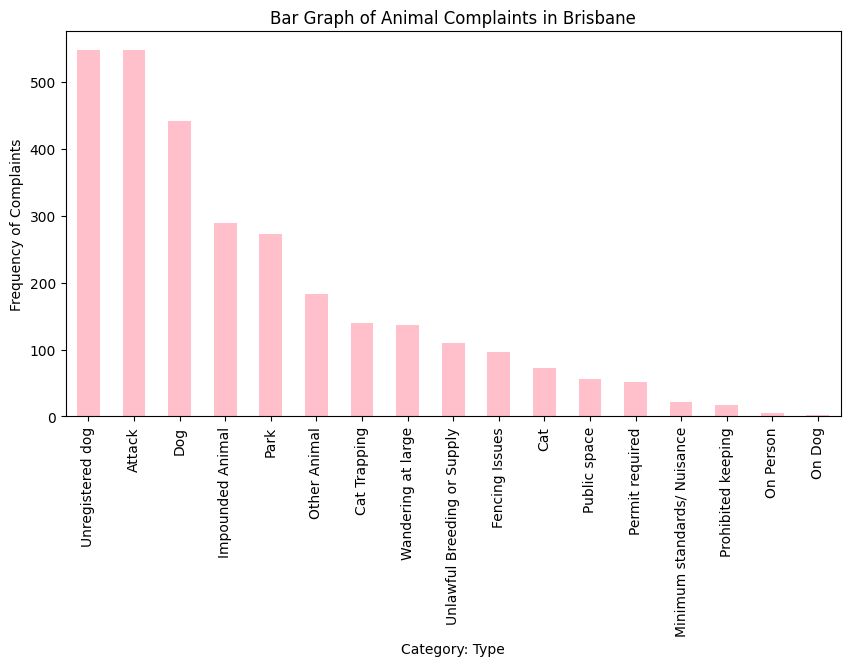

In [21]:
fig, ax = plt.subplots()
ax.set_title('Bar Graph of Animal Complaints in Brisbane')
ax.set_xlabel('Type of Complaint')
ax.set_ylabel('Frequency of Complaints')

animal_df["Category: Type"].value_counts().plot(kind="bar", facecolor="pink")


Impounded Animals:
* Aggressive behaviour
* Loud
* Wandering
* Abundance in shelters

Unlawful breeding or supply:
* Less likely to come in contact with the public
* May not evoke an emotional response from individuals
* Might involve more complex legalities

<Axes: title={'center': 'Line Graph of Animal Complaints in Brisbane'}, xlabel='Category: Type', ylabel='Frequency of Complaints'>

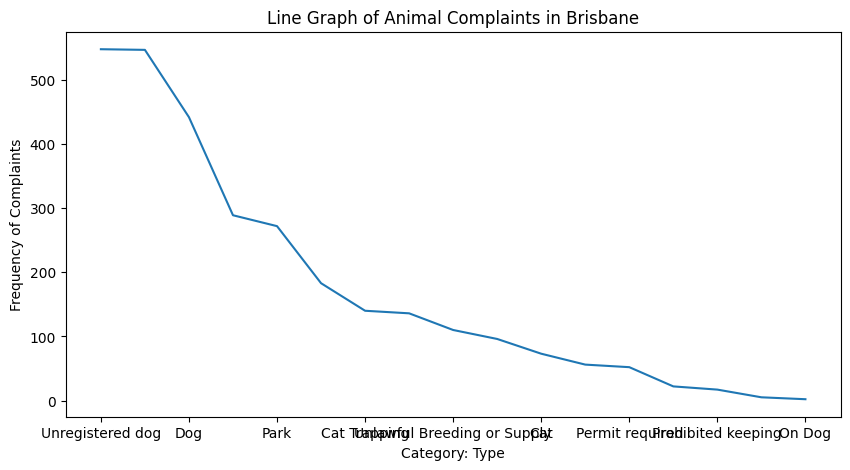

In [22]:
fig, ax = plt.subplots()
ax.set_title('Line Graph of Animal Complaints in Brisbane')
ax.set_xlabel('Type of Complaint')
ax.set_ylabel('Frequency of Complaints')

animal_df["Category: Type"].value_counts().plot(kind="line")

This linear decline depicts the frequency of complaint importance, in which "unregistered dogs" seems to be the peak.

🦮🙅‍♀️

<Axes: title={'center': 'Pie Chart of Animal Complaints in Brisbane'}, ylabel='count'>

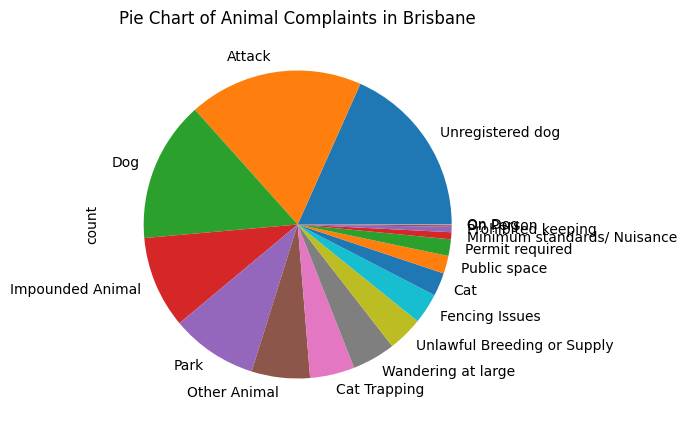

In [23]:
fig, ax = plt.subplots()
ax.set_title('Pie Chart of Animal Complaints in Brisbane')

animal_df["Category: Type"].value_counts().plot(kind="pie")

As we examine the pie chart, a complex tapestry of animal-related complaints comes to light, highlighting the varied challenges our community faces in coexisting with the diverse fauna of our city.

🌎
So let's move onto the geographical aspect of this dataset.

<Axes: title={'center': 'Pie Chart of Animal Complaints in Brisbane'}, ylabel='count'>

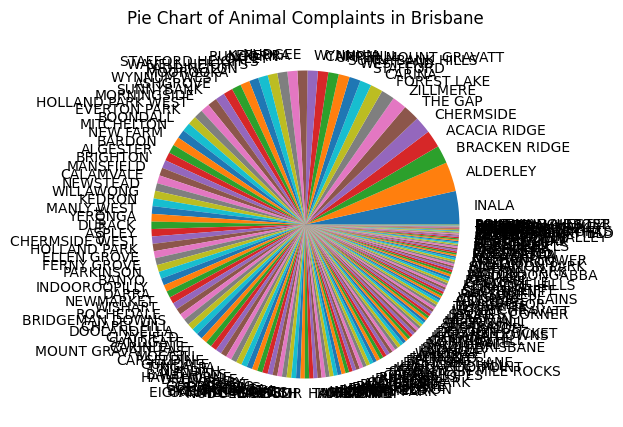

In [24]:
fig, ax = plt.subplots()
ax.set_title('Pie Chart of Animal Complaints in Brisbane')

animal_df["Location: Suburb"].value_counts().plot(kind="pie")

“Obviously it’s not good news,” is what RSPCA QLD had to say about the state’s rising cases of animal cruelty, which sadly lists Inala as having the third most number of complaints in 2019.

In the 2021 census, Inala had a population of 15,273 people.

<Axes: title={'center': 'Area Graph of Animal Complaints in Brisbane'}, xlabel='Category: Type', ylabel='Frequency of Complaints'>

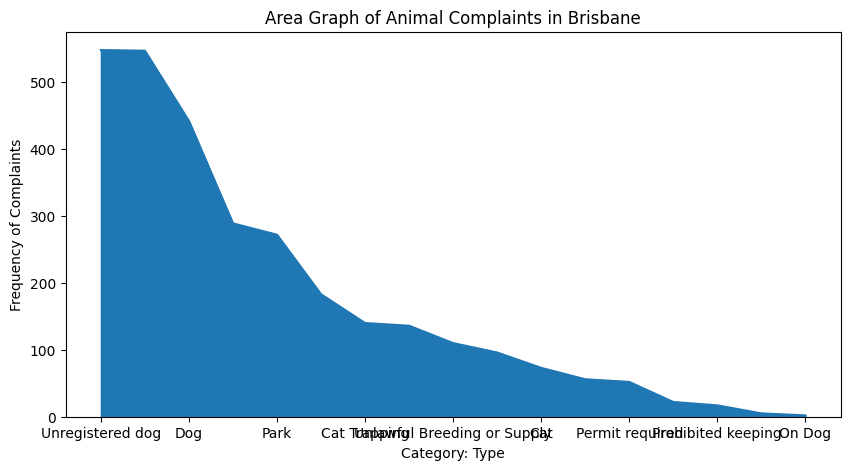

In [25]:
fig, ax = plt.subplots()
ax.set_title('Area Graph of Animal Complaints in Brisbane')
ax.set_xlabel('Type of Complaint')
ax.set_ylabel('Frequency of Complaints')

animal_df["Category: Type"].value_counts().plot(kind="area")

<Axes: title={'center': 'Area Graph of Animal Complaints in Brisbane'}, xlabel='Location: Suburb', ylabel='Frequency of Complaints'>

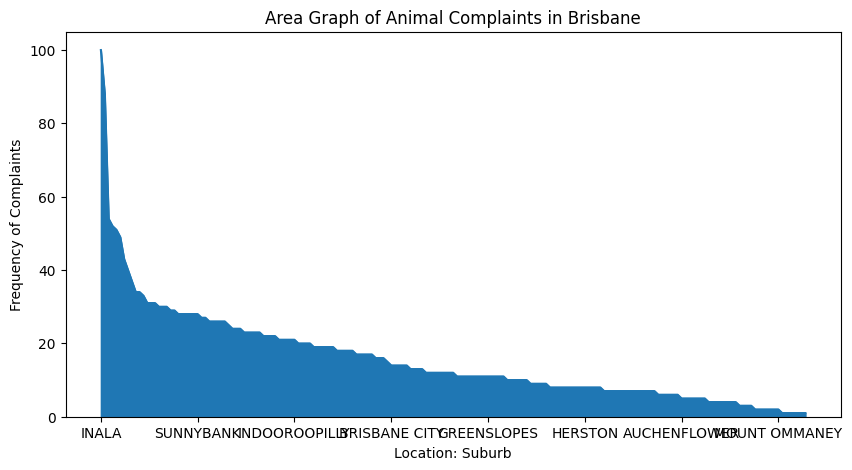

In [26]:
fig, ax = plt.subplots()
ax.set_title('Area Graph of Animal Complaints in Brisbane')
ax.set_xlabel('Type of Complaint')
ax.set_ylabel('Frequency of Complaints')

animal_df["Location: Suburb"].value_counts().plot(kind="area")



"Almost 150 people reported being attacked by an animal in Brisbane last year, with southern suburbs topping the list for aggressive behaviour. Inala had the most complaints about attacks on people last year, with 33 reports.” - The Brisbane Times

# CONCLUSION 🐈

DRIVING QUESTION: “Does the rate of urban development in specific areas correlate with an increased frequency of animal-related complaints?” 

➡➡➡ Through this data's lens, we see a direct link between urbanization and increased complaints. This hypothesis is rooted in the recognition that as urban suburbs expand, they often alter the environment that animals rely on.

# Thank you !